In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore') 


### SVD 이전 기본 데이터로 모델링한 결과

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# CSV 파일 로드 (파일 경로를 정확히 입력하세요)
df = pd.read_csv('end_hotel_bookings.csv')

# feature와 label 분리
X = df.drop(columns='is_canceled')
y = df['is_canceled']

# 데이터셋을 훈련용과 테스트용으로 나누기
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='binary'),
           'recall': make_scorer(recall_score, average='binary'),
           'f1': make_scorer(f1_score, average='binary')}

# 모델 정의
model = RandomForestClassifier()

# 교차 검증 실행
score = cross_validate(model, train_input, train_target,
                      scoring=scoring,
                      return_train_score=True, n_jobs=-1,
                      cv=StratifiedKFold())

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

# 최종 모델 훈련 (전체 훈련 데이터 사용)
final_model = RandomForestClassifier()
final_model.fit(train_input, train_target)

# 테스트 세트에 대한 평가
test_accuracy = accuracy_score(test_target, final_model.predict(test_input))
test_precision = precision_score(test_target, final_model.predict(test_input))
test_recall = recall_score(test_target, final_model.predict(test_input))
test_f1 = f1_score(test_target, final_model.predict(test_input))

print("\nFinal Test Set Evaluation:")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1:", test_f1)


Train Accuracy: 0.9964007007485268
Test Accuracy: 0.8864893560545735
Train Precision: 0.9961178198661574
Test Precision: 0.88071105797405
Train Recall: 0.9942153680982159
Test Recall: 0.8043200820668698
Train F1: 0.9951654008215949
Test F1: 0.8407687744207573

Final Test Set Evaluation:
Test Accuracy: 0.8909415212128934
Test Precision: 0.8853700943864878
Test Recall: 0.8125142466377935
Test F1: 0.8473790562225127


### GridSearch를 통한 하이퍼파라미터튜닝(기본 데이터)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'max_depth': 8, 'n_estimators': 100}

Final Test Set Evaluation:
Test Accuracy: 0.818490678218032
Test Precision: 0.9107338444687842
Test Recall: 0.5686118076134032
Test F1: 0.7001122649452708
Test ROC AUC: 0.9157086782389728


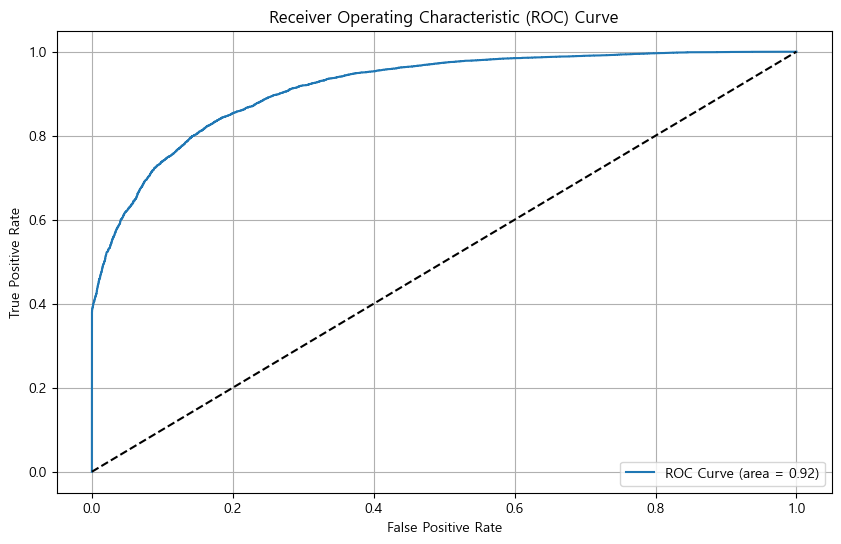

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# CSV 파일 로드 (파일 경로를 정확히 입력하세요)
df = pd.read_csv('end_hotel_bookings.csv')

# feature와 label 분리
X = df.drop(columns='is_canceled')
y = df['is_canceled']

# 데이터셋을 훈련용과 테스트용으로 나누기
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='binary'),
           'recall': make_scorer(recall_score, average='binary'),
           'f1': make_scorer(f1_score, average='binary'),
           'roc_auc': 'roc_auc'}

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [4, 6, 8]
}

# 모델 정의
model = RandomForestClassifier(random_state=42)

# GridSearchCV 정의
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring=scoring, refit='roc_auc', 
                           cv=StratifiedKFold(), n_jobs=-1, verbose=2)

# GridSearchCV 실행
grid_search.fit(train_input, train_target)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최종 모델 훈련 (전체 훈련 데이터 사용)
final_model = grid_search.best_estimator_
final_model.fit(train_input, train_target)

# 테스트 세트에 대한 평가
test_accuracy = accuracy_score(test_target, final_model.predict(test_input))
test_precision = precision_score(test_target, final_model.predict(test_input))
test_recall = recall_score(test_target, final_model.predict(test_input))
test_f1 = f1_score(test_target, final_model.predict(test_input))
test_roc_auc = roc_auc_score(test_target, final_model.predict_proba(test_input)[:, 1])

print("\nFinal Test Set Evaluation:")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1:", test_f1)
print("Test ROC AUC:", test_roc_auc)

# ROC Curve 그리기
fpr, tpr, thresholds = roc_curve(test_target, final_model.predict_proba(test_input)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### SVD_Minmax에 대한 실행 결과(기본 하이퍼파라미터)

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# CSV 파일 로드 (파일 경로를 정확히 입력하세요)
df = pd.read_csv('SVD_Minmax.csv')

# feature와 label 분리
X = df.drop(columns='is_canceled')
y = df['is_canceled']

# 데이터셋을 훈련용과 테스트용으로 나누기
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='binary'),
           'recall': make_scorer(recall_score, average='binary'),
           'f1': make_scorer(f1_score, average='binary')}

# 모델 정의
model = RandomForestClassifier()

# 교차 검증 실행
score = cross_validate(model, train_input, train_target,
                      scoring=scoring,
                      return_train_score=True, n_jobs=-1,
                      cv=StratifiedKFold())

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

# 최종 모델 훈련 (전체 훈련 데이터 사용)
final_model = RandomForestClassifier()
final_model.fit(train_input, train_target)

# 테스트 세트에 대한 평가
test_accuracy = accuracy_score(test_target, final_model.predict(test_input))
test_precision = precision_score(test_target, final_model.predict(test_input))
test_recall = recall_score(test_target, final_model.predict(test_input))
test_f1 = f1_score(test_target, final_model.predict(test_input))

print("\nFinal Test Set Evaluation:")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1:", test_f1)


Train Accuracy: 0.9963927376970855
Test Accuracy: 0.8397834050007964
Train Precision: 0.9962238983397029
Test Precision: 0.8098261012124311
Train Recall: 0.9940871421673961
Test Recall: 0.7450491401204669
Train F1: 0.9951541347374937
Test F1: 0.7760392175344016

Final Test Set Evaluation:
Test Accuracy: 0.8471992185841084
Test Precision: 0.8168462291870715
Test Recall: 0.7604285388648279
Test F1: 0.7876283791760122


### SVD_Minmax에 대한 그리드서치 수행 결과

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# CSV 파일 로드 (파일 경로를 정확히 입력하세요)
df = pd.read_csv('SVD_Minmax.csv')

# feature와 label 분리
X = df.drop(columns='is_canceled')
y = df['is_canceled']

# 데이터셋을 훈련용과 테스트용으로 나누기
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='binary'),
           'recall': make_scorer(recall_score, average='binary'),
           'f1': make_scorer(f1_score, average='binary')}

# 하이퍼파라미터 그리드 정의
param_grid = {
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [4, 6, 8]
}

# 모델 정의
model = RandomForestClassifier(random_state=42)

# GridSearchCV 정의
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring=scoring, refit='accuracy', 
                           cv=StratifiedKFold(), n_jobs=-1, verbose=2)

# GridSearchCV 실행
grid_search.fit(train_input, train_target)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최종 모델 훈련 (전체 훈련 데이터 사용)
final_model = grid_search.best_estimator_
final_model.fit(train_input, train_target)

# 테스트 세트에 대한 평가
test_accuracy = accuracy_score(test_target, final_model.predict(test_input))
test_precision = precision_score(test_target, final_model.predict(test_input))
test_recall = recall_score(test_target, final_model.predict(test_input))
test_f1 = f1_score(test_target, final_model.predict(test_input))

print("\nFinal Test Set Evaluation:")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1:", test_f1)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'max_depth': 8, 'n_estimators': 500}

Final Test Set Evaluation:
Test Accuracy: 0.7847284155094068
Test Precision: 0.9368073567554822
Test Recall: 0.4528151356279918
Test F1: 0.6105263157894737


### SVD_Standard에 대한 실행 결과(기본 하이퍼파라미터)

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# CSV 파일 로드 (파일 경로를 정확히 입력하세요)
df = pd.read_csv('SVD_Standard.csv')

# feature와 label 분리
X = df.drop(columns='is_canceled')
y = df['is_canceled']

# 데이터셋을 훈련용과 테스트용으로 나누기
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='binary'),
           'recall': make_scorer(recall_score, average='binary'),
           'f1': make_scorer(f1_score, average='binary')}

# 모델 정의
model = RandomForestClassifier()

# 교차 검증 실행
score = cross_validate(model, train_input, train_target,
                      scoring=scoring,
                      return_train_score=True, n_jobs=-1,
                      cv=StratifiedKFold())

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

# 최종 모델 훈련 (전체 훈련 데이터 사용)
final_model = RandomForestClassifier()
final_model.fit(train_input, train_target)

# 테스트 세트에 대한 평가
test_accuracy = accuracy_score(test_target, final_model.predict(test_input))
test_precision = precision_score(test_target, final_model.predict(test_input))
test_recall = recall_score(test_target, final_model.predict(test_input))
test_f1 = f1_score(test_target, final_model.predict(test_input))

print("\nFinal Test Set Evaluation:")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1:", test_f1)


Train Accuracy: 0.996395392047566
Test Accuracy: 0.8645219514784731
Train Precision: 0.996663072178233
Test Precision: 0.8878176789740353
Train Recall: 0.9936525796757343
Test Recall: 0.7284646676766409
Train F1: 0.9951555235461678
Test F1: 0.8002611846795518

Final Test Set Evaluation:
Test Accuracy: 0.8687306238586656
Test Precision: 0.8905841924398625
Test Recall: 0.7384317301116936
Test F1: 0.8074023303632625


### SVD_Standard에 대한 그리드 서치 결과

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'max_depth': 30, 'n_estimators': 500}

Final Test Set Evaluation:
Test Accuracy: 0.8700896080180065
Test Precision: 0.8902089307660794
Test Recall: 0.7429906542056075
Test F1: 0.8099645896750948
Test ROC AUC: 0.9406898379211911


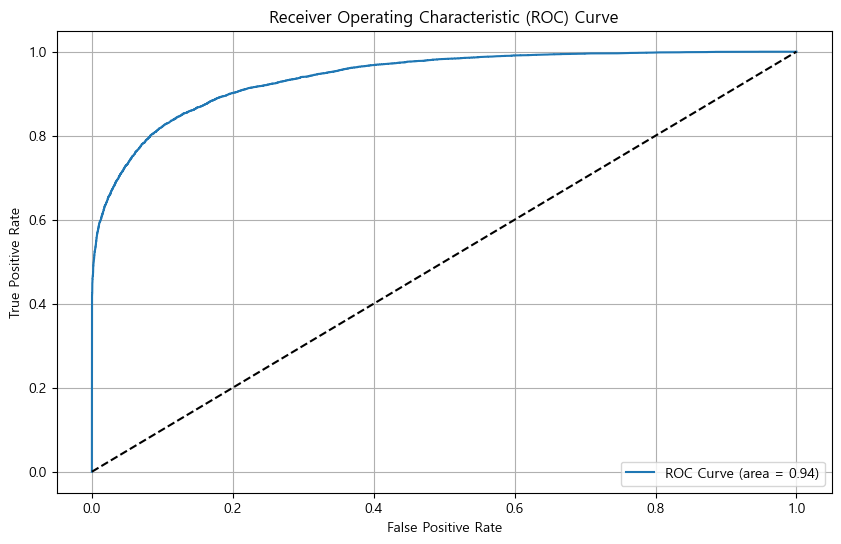

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# CSV 파일 로드 (파일 경로를 정확히 입력하세요)
df = pd.read_csv('SVD_Standard.csv')

# feature와 label 분리
X = df.drop(columns='is_canceled')
y = df['is_canceled']

# 데이터셋을 훈련용과 테스트용으로 나누기
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='binary'),
           'recall': make_scorer(recall_score, average='binary'),
           'f1': make_scorer(f1_score, average='binary'),
           'roc_auc': 'roc_auc'}

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5,10,20,30,40]
}

# 모델 정의
model = RandomForestClassifier(random_state=42)

# GridSearchCV 정의
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring=scoring, refit='roc_auc', 
                           cv=StratifiedKFold(), n_jobs=-1, verbose=2)

# GridSearchCV 실행
grid_search.fit(train_input, train_target)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최종 모델 훈련 (전체 훈련 데이터 사용)
final_model = grid_search.best_estimator_
final_model.fit(train_input, train_target)

# 테스트 세트에 대한 평가
test_accuracy = accuracy_score(test_target, final_model.predict(test_input))
test_precision = precision_score(test_target, final_model.predict(test_input))
test_recall = recall_score(test_target, final_model.predict(test_input))
test_f1 = f1_score(test_target, final_model.predict(test_input))
test_roc_auc = roc_auc_score(test_target, final_model.predict_proba(test_input)[:, 1])

print("\nFinal Test Set Evaluation:")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1:", test_f1)
print("Test ROC AUC:", test_roc_auc)

# ROC Curve 그리기
fpr, tpr, thresholds = roc_curve(test_target, final_model.predict_proba(test_input)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [13]:
# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 30, 'n_estimators': 500}



Confusion Matrix:
[[13969   804]
 [ 2255  6519]]


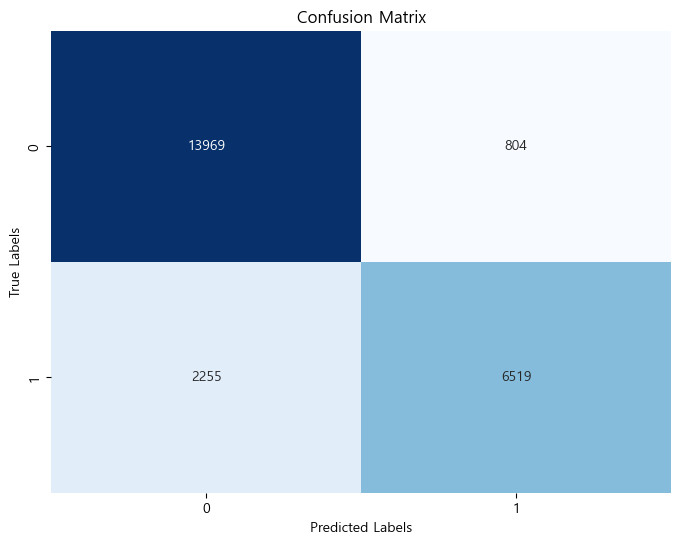

In [15]:
from sklearn.metrics import confusion_matrix

# 혼동행렬 출력
conf_mat = confusion_matrix(test_target, final_model.predict(test_input))
print("\nConfusion Matrix:")
print(conf_mat)

# 혼동행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()